In [17]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import time

from sklearn.model_selection import train_test_split

import MeCab
from konlpy.tag import Okt

import sys
sys.path.append('/Users/anhyojun/WorkSpace/KDT2/MyModule')
from KDTModule import *

import torch.optim as optim
from torch.utils.data import DataLoader

In [18]:
def crawling_blog_page(No, start_page, end_page, save_file_name):
    total_title_list = []
    # Chrome WebDriver 경로 설정
    webdriver_path = '/Users/anhyojun/WebDriver/chromedriver'

    # WebDriver 설정 및 실행
    service = Service(webdriver_path)
    driver = webdriver.Chrome(service=service)

    for i in range(start_page, end_page+2):
        url = f'https://section.blog.naver.com/ThemePost.naver?directoryNo={No}&activeDirectorySeq=3&currentPage={i}'

        # 셀레니움으로 html 동적 크롤링
        driver.get(url)
        time.sleep(1)
        html = driver.page_source

        soup = BeautifulSoup(html, 'html.parser')
        desc = soup.find_all('div', class_='desc')

        for i in desc:
            total_title_list.append(i.text.replace('\n', ' '))

    with open(save_file_name, 'w', encoding='utf-8') as f:
        for i in total_title_list:
            f.write(i+'\n')

In [20]:
# section_name = ['game.txt', 'sports.txt', 'photo.txt', 'vehicle.txt',
#                 'habby.txt', 'domestic.txt', 'overseas.txt', 'restaurant.txt']

# for index, name in enumerate(section_name):
#     crawling_blog_page(index+22, 1, 100, name)

In [21]:
def read_txt(section):
    PATH = '/Users/anhyojun/WorkSpace/KDT2/김소현 강사님/프로젝트/6번째 프로젝트/txt'
    with open(f"{PATH}/{section}.txt", "r", encoding="utf-8") as f:
        return f.readlines()

In [22]:
domestic = read_txt('domestic')
game = read_txt('game')
habby = read_txt('habby')
overseas = read_txt('overseas')
photo = read_txt('photo')
restaurant = read_txt('restaurant')
sports = read_txt('sports')
vehicle = read_txt('vehicle')

text_list = domestic + game + habby + overseas + photo + restaurant + sports + vehicle

section_list = [domestic, game, habby, overseas, photo, restaurant, sports, vehicle]

label_list = []
for index, section in enumerate(section_list):
    label = [index] * len(section)
    label_list += label

In [23]:
text_list[:5], label_list[:5]

(['대구 하중도 코스모스 금호강 금호꽃섬 축제 2024 정원박람회 주차\n',
  'IN JEJU\n',
  '흑백요리사 식당 백수저 안유성 명장 광주옥 평양냉면 장수나주곰탕 가매일식\n',
  '2024 세종축제 기본정보 호수공원 드론쇼 불꽃놀이 개막식 관람 후기\n',
  '속초2박3일/계획없이 가보자고! 고성 더엠브로시아 하늬라벤더팜 씨크루즈호텔\n'],
 [0, 0, 0, 0, 0])

In [24]:
# 훈련, 검증, 테스트 분리
train_texts, test_texts, train_labels, test_labels = train_test_split(text_list, label_list, test_size=0.3,
                                                                      stratify=label_list, random_state=42)
train_texts, valid_texts, train_labels, valid_labels = train_test_split(train_texts, train_labels, test_size=0.3,
                                                                        stratify=train_labels, random_state=42)

print(f"[train] : {len(train_texts)}")
print(f"[valid] : {len(valid_texts)}")
print(f"[test] : {len(test_texts)}")

[train] : 3920
[valid] : 1680
[test] : 2400


In [25]:
# MeCab 토크나이저
def mecab_tokenizer(text):
    mecab = MeCab.Tagger('-r /opt/homebrew/etc/mecabrc -Owakati')
    return mecab.parse(text).split()

print(mecab_tokenizer(text_list[0]))

['대구', '하중도', '코스모스', '금호강', '금호꽃섬', '축제', '2024', '정원박람회', '주차']


In [26]:
# Okt 토크나이저
print(Okt().morphs(text_list[0]))

['대구', '하중도', '코스모스', '금호강', '금호', '꽃섬', '축제', '2024', '정원', '박람회', '주차', '\n']


In [27]:
voca = build_voca(train_texts, stopwords='stopword.txt', tokenizer=mecab_tokenizer)
print(voca)

{'<PAD>': 0, '<UNK>': 1, '페르소나': 2, '더': 3, '팬텀': 4, 'X': 5, '리세': 6, '티어와': 7, '쿠폰으로': 8, 'RPG': 9, '게임': 10, '세팅하는': 11, '방법은': 12, '남해': 13, '독일마을': 14, '맛집': 15, '부어스트라덴': 16, '내돈내산': 17, '분당': 18, '골프레슨': 19, '테이크어웨이': 20, '자세': 21, '교정': 22, '후': 23, '좋아진': 24, 'feat': 25, 'LPGA': 26, '김송희': 27, '프로': 28, '페이스': 29, '골프': 30, '부산대': 31, '스튜디오': 32, 'CK': 33, '컬러증명사진': 34, '셀프': 35, '흑백사진': 36, '촬영🤳📸': 37, '프리미엄': 38, '싼타페': 39, 'DM': 40, 'WD': 41, '디젤': 42, '중고차': 43, '시장에서도': 44, '인기가': 45, '높은': 46, '차량이라는데': 47, '식사동': 48, '조개와': 49, '고기를': 50, '무한리필로': 51, '즐길': 52, '수': 53, '있는': 54, '왕십리조개창고': 55, '일산점': 56, '다녀온': 57, '후기': 58, '주차정보': 59, '가을': 60, '단풍': 61, '여행지도': 62, '가볼': 63, '만한': 64, '전국': 65, '명소': 66, '추천': 67, '아침고요수목원': 68, '장태산자연휴양림': 69, '대둔산도립공원': 70, '경북천년숲정원': 71, '롤': 72, '시즌': 73, '사이온': 74, '룬': 75, '최신': 76, '서폿': 77, '것도': 78, '템트리': 79, '카운터': 80, '전해드려요': 81, '입호강': 82, '제대로했던': 83, '통영': 84, '부산': 85, '전포헬스장': 86, '존피트니스': 87, '재활': 88, '체형교정': 89, 

In [28]:
train_tensor_token = make_tensor_token(train_texts, voca, stopwords='stopword.txt', tokenizer=mecab_tokenizer)
valid_tensor_token = make_tensor_token(valid_texts, voca, stopwords='stopword.txt', tokenizer=mecab_tokenizer)
# test_tensor_token = make_tensor_token(test_texts, voca, stopwords='stopword.txt', tokenizer=mecab_tokenizer)

train_tensor_token

[tensor([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 tensor([13, 14, 15, 16, 17]),
 tensor([18, 19, 20, 21, 22, 23, 24, 21, 25, 26, 27, 28, 29, 30]),
 tensor([31, 32, 33, 25, 34, 35, 36, 37]),
 tensor([38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 tensor([48, 15, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]),
 tensor([60, 61, 62, 63, 64, 65, 61, 66, 67, 68, 69, 70, 71]),
 tensor([72, 73, 74, 75, 76, 77, 78, 79, 80, 81]),
 tensor([82, 83, 84, 15]),
 tensor([85, 86, 67, 87, 88, 89, 90, 91]),
 tensor([ 92,  93,  94,  95,  96,  97,  98,  99, 100,  58]),
 tensor([ 72, 101, 102, 103,  75, 104, 105, 106, 107, 108, 109]),
 tensor([110, 111, 112, 113, 114, 115, 116]),
 tensor([117, 118, 119, 120, 121, 122, 123, 124]),
 tensor([125, 126, 127, 128, 129, 130, 131, 132]),
 tensor([133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,  58]),
 tensor([145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 147]),
 tensor([157, 158, 159, 124, 160, 161, 162, 119, 163, 164]),
 tensor([165, 166,

In [29]:
token_length_list = [len(token) for token in train_tensor_token]
print(token_length_list)

[11, 5, 14, 8, 10, 13, 13, 10, 4, 8, 10, 11, 7, 8, 8, 13, 13, 10, 11, 9, 8, 5, 3, 1, 6, 11, 6, 4, 6, 8, 7, 6, 7, 6, 9, 8, 8, 7, 9, 6, 11, 3, 9, 3, 9, 8, 12, 8, 9, 5, 4, 9, 4, 8, 11, 6, 6, 9, 7, 5, 8, 5, 10, 7, 6, 5, 6, 6, 9, 6, 6, 14, 3, 7, 9, 7, 4, 10, 6, 9, 11, 3, 8, 11, 9, 8, 8, 9, 5, 7, 6, 8, 7, 7, 6, 7, 5, 5, 7, 3, 6, 8, 11, 9, 6, 6, 7, 8, 10, 11, 8, 8, 6, 7, 7, 8, 8, 6, 6, 10, 7, 3, 7, 6, 7, 8, 6, 8, 9, 9, 9, 10, 7, 10, 7, 5, 22, 3, 6, 8, 7, 14, 7, 5, 8, 8, 6, 7, 6, 7, 11, 4, 9, 13, 9, 10, 11, 4, 11, 13, 6, 7, 6, 7, 11, 7, 8, 7, 7, 10, 7, 9, 7, 6, 9, 5, 7, 11, 12, 7, 9, 4, 5, 7, 8, 10, 5, 5, 8, 6, 5, 4, 5, 11, 9, 4, 7, 7, 7, 4, 4, 8, 6, 7, 6, 9, 12, 8, 10, 8, 15, 7, 3, 11, 6, 10, 10, 7, 5, 9, 8, 7, 5, 9, 6, 12, 9, 9, 11, 7, 5, 6, 5, 8, 10, 10, 9, 7, 8, 8, 10, 7, 4, 16, 5, 9, 9, 4, 10, 8, 4, 7, 7, 7, 9, 3, 16, 13, 3, 9, 5, 7, 5, 14, 8, 6, 7, 11, 9, 12, 8, 6, 11, 8, 12, 5, 10, 7, 10, 9, 9, 8, 8, 3, 7, 6, 8, 6, 8, 14, 6, 6, 8, 11, 11, 6, 9, 10, 9, 10, 10, 7, 7, 27, 8, 10, 5, 11, 7, 

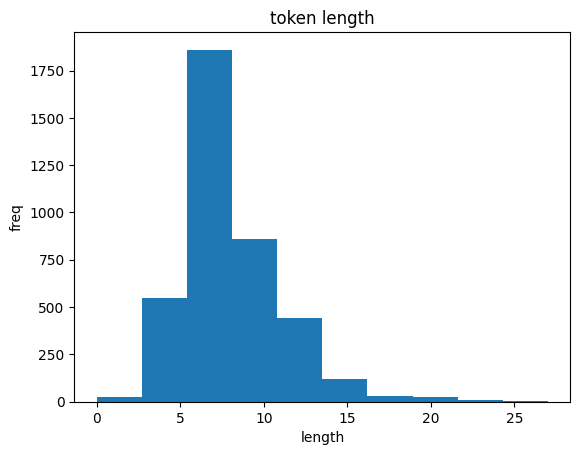

In [30]:
plt.hist(token_length_list)
plt.title('token length')
plt.xlabel('length')
plt.ylabel('freq')
plt.show()

In [36]:
max_length = 10
front = False

train_pad_token = pad_token_tensor(train_tensor_token, max_length=max_length, cut_front=front, padding_token=0)
valid_pad_token = pad_token_tensor(valid_tensor_token, max_length=max_length, cut_front=front, padding_token=0)

train_pad_token

tensor([[    2,     3,     4,  ...,     9,    10,    11],
        [   13,    14,    15,  ...,     0,     0,     0],
        [   18,    19,    20,  ...,    21,    25,    26],
        ...,
        [13802,  6246, 13803,  ...,  4203, 13808,  1494],
        [ 1290,  6677,  6956,  ...,     0,     0,     0],
        [  414, 11343,    95,  ..., 13810,   672,   406]])

In [32]:
train_labels2D = [[label] for label in train_labels]
valid_labels2D = [[label] for label in valid_labels]
# test_labels2D = [[label] for label in test_labels]]
train_labels2D[:5]

[[1], [5], [6], [4], [7]]

In [38]:
trainDS = TextDataset(train_pad_token, train_labels2D)
validDS = TextDataset(valid_pad_token, valid_labels2D)

batch_size = 16

trainDL = DataLoader(trainDS, batch_size = batch_size)
validDL = DataLoader(validDS, batch_size = batch_size)

trainDL.dataset[0]

(tensor([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11]), tensor([1.]))

In [34]:
n_vocab = len(voca)
hidden_dim = 64
embedding_dim = 128
n_layers = 3
dropout = 0.5

model = SentenceClassifier(n_vocab, hidden_dim, embedding_dim, n_layers, output_size=8,
                           dropout=dropout, bidirectional=False, model_type='lstm')

adam = optim.Adam(model.parameters(), lr=0.001)
rmsprop = optim.RMSprop(model.parameters(), lr=0.001)

EPOCH = 100
MODEL_PATH = '/Users/anhyojun/WorkSpace/KDT2/김소현 강사님/TORCH_NLP/숙제/model_1009'

result = training(trainDL, validDL, model, model_type='multiclass', optimizer=rmsprop,
                  epoch=EPOCH, endurance_cnt=10, view_epoch=1, num_classes=8, SAVE_PATH=MODEL_PATH)

[EPOCH] : 1에서 모델 저장 완료.
[Loss : 1/100] Train : 1.8665, Test : 1.7220
[Score  : 1/100] Train : 0.2378, Test : 0.3369
[EPOCH] : 2에서 모델 저장 완료.
[Loss : 2/100] Train : 1.4926, Test : 1.6154
[Score  : 2/100] Train : 0.4158, Test : 0.4137
[EPOCH] : 3에서 모델 저장 완료.
[Loss : 3/100] Train : 1.0541, Test : 1.5304
[Score  : 3/100] Train : 0.6161, Test : 0.5012
[Loss : 4/100] Train : 0.6949, Test : 1.6700
[Score  : 4/100] Train : 0.7740, Test : 0.5250
[Loss : 5/100] Train : 0.4940, Test : 1.5398
[Score  : 5/100] Train : 0.8467, Test : 0.5851
[Loss : 6/100] Train : 0.3554, Test : 1.5842
[Score  : 6/100] Train : 0.8926, Test : 0.5905
[Loss : 7/100] Train : 0.2636, Test : 1.7863
[Score  : 7/100] Train : 0.9237, Test : 0.5702
[Loss : 8/100] Train : 0.1863, Test : 1.7524
[Score  : 8/100] Train : 0.9469, Test : 0.5738
[Loss : 9/100] Train : 0.1425, Test : 2.0240
[Score  : 9/100] Train : 0.9599, Test : 0.5435
[Loss : 10/100] Train : 0.1152, Test : 1.9639
[Score  : 10/100] Train : 0.9709, Test : 0.5792
[Loss 

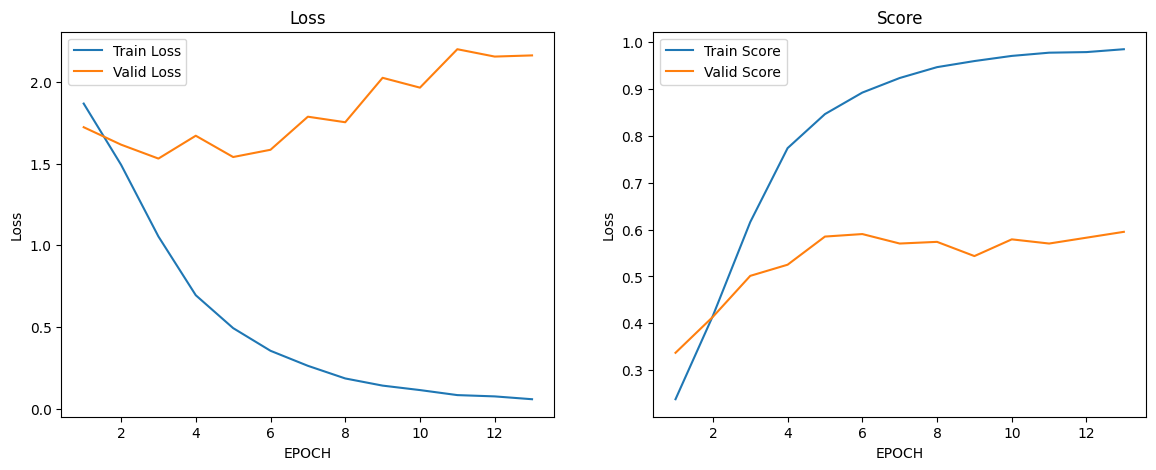

In [35]:
DrawPlot(result)
plt.show()